###LinearRegression 클래스 - Ordinary Lest Squares<br>   
예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화하는 OLS 추정 방식으로 구현한 클래스  



In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=Flase, copy_X=True, n_jobs=1)

SyntaxError: ignored

Ordinary Least Squares 기반의 회귀 계쑤 계산은 입력 피처의 독립성에 많은 영향을 받는다. 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해진다. 이러한 현상을 다중공선성(multi-collinearity) 문제라고 합니다. 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용합니다. 또한 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행하는 것도 고려해볼 수 있다.

###회귀 평가 지표<br>
cross_val_score나 GridSearchCV 에서 평가 시 사용되는 scoring 파라미터의 적용값이다.  
1. MAE  
2. MSE  
3. R^2  

##LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

feature 설명  
CRIM: 지역별 범죄 발생률  
ZN: 25,000평방피트를 초과하는 거주 지역의 비율  
NDUS: 비상업 지역 넓이 비율  
CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX: 일산화질소 농도  
RM: 거주할 수 있는 방 개수  
AGE: 1940년 이전에 건축된 소유 주택의 비율  
DIS: 5개 주요 고용센터까지의 가중 거리  
RAD: 고속도로 접근 용이도  
TAX: 10,000달러당 재산세율  
PTRATIO: 지역의 교사와 학생 수 비율  
B: 지역의 흑인 거주 비율  
LSTAT: 하위 계층의 비율  
MEDV: 본인 소유의 주택 가격(중앙값)  

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

#boston 데이터 세트 로드
boston = load_boston()
boston

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [4]:
#boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(boston.data,columns = boston.feature_names)
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
#boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:',bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


각 칼럼이 회귀 결과에 미치는 영향이 어느정도인지 시작화해서 알아보자.  
seaborn의 regplot() DLYDGOTJ X,Y축 값의 산점도와 함께 선형 회귀 직선을 그려준다.

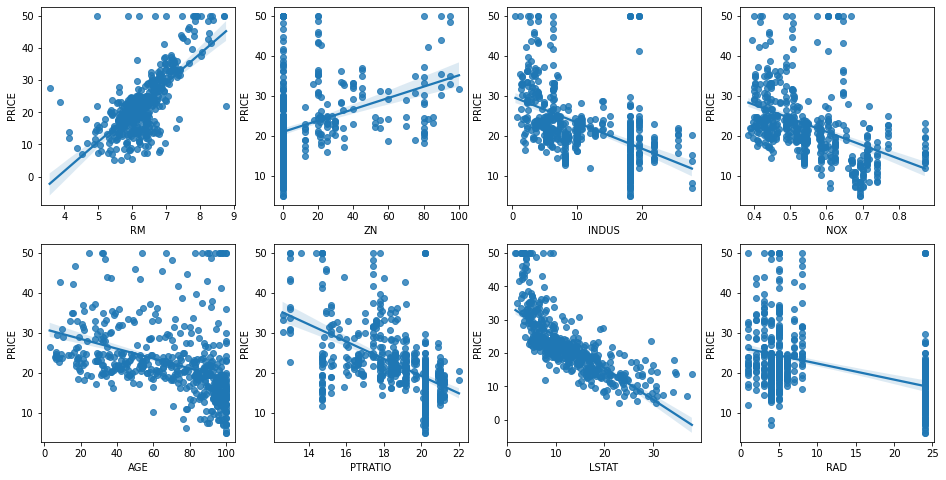

In [14]:
#2개의 행과 4개의 열을 가진 subplots를 이용. axs 는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)   #몫 : 0,1  -> 행 두개
    col = i%4  #나머지 : 0,1,2,3  -> 열 네개
    #시본의 regplot
    sns.regplot(x=feature,y='PRICE',data=bostonDF,ax=axs[row][col])


'RM'(거주할 수 있는 방 개수) 과 'LSTAT'(하위 계층의 비율)의 PRICE 영향도가 가장 두드러지게 나타난다.  
RM(방 개수)는 양 방향의 선형성이 가장 크다. 즉, 방의 크기가 클수록 가격이 증가하는 모습을 보여준다.  
LSTAT(하위 계층의 비율)는 음 방향의 선형성이 가장 크다. 즉, LSTAT이 적을 수록 PRICE가 증가하는 모습이 확연히 보인다.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

In [17]:
y_target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [18]:
X_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_target,test_size=0.2,random_state=156)

In [21]:
X_train.shape

(404, 13)

In [22]:
X_test.shape

(102, 13)

In [23]:
y_train.shape

(404,)

In [24]:
y_test.shape

(102,)

In [26]:
#선형 회귀 OLS로 학습/에측/평가 수행
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE: 18.140, RMSE: 4.259
Variance score: 0.785


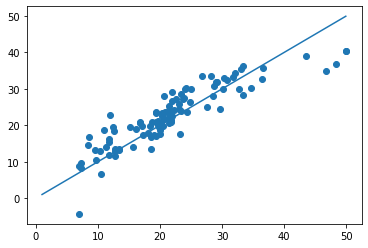

In [35]:
plt.scatter(y_test,y_preds)
x = np.arange(1,50,0.1)
y = np.arange(1,50,0.1)
plt.plot(x,y)

LinearRegression 으로 생성한 주택가격 모델의 intercept(절편)과 coefficients(회귀 계수) 값을 보자. 절편은 LinearRegression 객체의 intercept_속성에, 회귀 계수는 coef_속성에 값이 저장되어 있다.

In [27]:
print('절편 값:',lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_,1))

절편 값: 39.290510119452605
회귀 계수 값: [ -0.1   0.1   0.    2.8 -20.1   3.4   0.   -1.6   0.3  -0.   -0.9   0.
  -0.5]


In [28]:
len(lr.coef_)   #총 13개의 회귀계수

13

coef_ 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은 순으로 출력해보자

In [29]:
#회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        2.8
RAD         0.3
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.6
NOX       -20.1
dtype: float64

RM의 양의 값으로 회귀 계수가 가장 크며, NOX피처의 회귀 계수 -값이 너무 커보인다.  
최적화를 수행하면서 피처 coefficients의 변화도 같이 살펴보자

5개의 폴드 세트에서 cross_val_score()를 이용해 교차 검증으로 MSE와 RMSE를 측정해 보자. 사이킷런의 cross_val_score()은 RMSE를 제공하지 않기 때문에 MSE 수치 결과를 RMSE로 변환해야 합니다. 일반적으로 회귀에서는 MSE값이 낮을수록 좋은 회귀 모델이다. 사이킷런의 metric 평가 기준에 MSE를 부합시키기 위해서는 scoring='neg_mean_squared_error'로 사이킷런의 Scoring 함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해서 반환한다. 따라서 Cross_val_score()에서 반환된 값에 다시 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE값이 된다.

In [31]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

#cross_val_score()로 5폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds 의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds 의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829
